# Other simulations

In [19]:
import numpy as np
from tqdm import tqdm

from scipy.integrate import solve_ivp

import matplotlib.pyplot as plt
%matplotlib inline

from collections import OrderedDict

In [20]:
import cobra
from cobra.io import load_model

import pandas as pd
import copy

import molmass
import reframed

from scipy.interpolate import interp1d
from sklearn.metrics import r2_score

from scipy.optimize import minimize


from sklearn.metrics import mean_squared_error



## Mechanisms involved in xyloglucan catabolism by the cellulosome-producing bacterium Ruminiclostridium cellulolyticum ([Ravachol et al. 2016](https://www.nature.com/articles/srep22770#MOESM79))

### Differential evolution

In [21]:
from scipy.optimize import differential_evolution
import numpy as np

In [22]:


# Define bounds
bounds = [(0, 10), (0, 10)]

# Lists to retain the trial population and energies
pop_min = []
energies_min = []


def quadratic_function(x, a, b, c):
    return a * (x[0] ** 2) + b * (x[1] ** 2) + c

a= 2
b=3
c =1

def maplike_fun(func, x, *args):
    # Store the current population
    
    print(x)
    pop_min.append(np.copy(x))

    # Evaluate the objective function for each individual
    # x is a 2D array where each row is a candidate solution
    e = []
    
    for x_i in x:
        e_i = func(x_i, *args)
        e.append(e_i)
    
    
    # Store the energies (objective function values)
    #energies.append(e)
    energies_min.append(e)
    
    
    # Return the objective values, ensuring it matches the length of x
    return e # Convert to a list or keep it as a numpy array

# Run differential evolution with the modified maplike_fun
res = differential_evolution(quadratic_function, bounds, workers=maplike_fun, polish=False, updating='deferred',maxiter=10,popsize=2,args=(a,b,c))

# Output results
print("Best solution found:", res.x)
print("Objective value of best solution:", res.fun)
print("Population history:", pop_min[-1])
print("Energies history:", energies_min[-1])

[[4.50327758 5.2465164 ]
 [9.25309087 2.47022   ]
 [3.336598   9.47846122]
 [6.84657875 0.49429292]
 [1.51692054 6.07696626]]
[[5.00745565 1.00571855]
 [3.56435315 2.47022   ]
 [3.336598   4.54379495]
 [3.40080635 2.76295024]
 [6.12808886 3.10050088]]
[[3.50675373 4.06776339]
 [5.864205   3.03562643]
 [2.26978836 3.78398117]
 [2.06547592 5.64412422]
 [5.06323037 9.4191122 ]]
[[4.35627076 3.95053936]
 [6.29089748 1.00571855]
 [3.67992673 2.2633564 ]
 [0.83780882 2.95321486]
 [4.58415006 1.43530109]]
[[1.62272508 2.2344167 ]
 [2.96170793 3.85158217]
 [1.20526167 2.58031326]
 [3.30492561 2.35437926]
 [4.45729472 1.26267949]]
[[3.34993106 3.68357438]
 [8.27002665 3.12874234]
 [1.20526167 1.34009105]
 [4.73781765 1.1036004 ]
 [4.45729472 3.68357438]]
[[2.36056717 1.42247921]
 [2.36056717 1.42247921]
 [1.62272508 1.11044994]
 [0.91855519 0.72588405]
 [3.52983464 0.49624294]]
[[1.1286416  0.61031828]
 [2.23266875 0.61031828]
 [1.5069833  0.25976019]
 [0.33012708 1.34009105]
 [0.70846877 0.841

**Input parameters for experiment**

In [23]:
OD = pd.read_csv("../input/Ravachol2016_batch_data/OD_xyloglucan.csv")
OD[" y"] = OD[" y"]*0.5

model = cobra.io.read_sbml_model('../models/RcH10_final.xml')
formula = model.metabolites.get_by_id("QQQG_e").notes["FORMULA"]
molarmass = molmass.Formula(formula).mass

xylog_glc_eq_dict =OrderedDict({
"EX_QQQG_e": 39/6})

C_dict =OrderedDict({
"Growth":OD.iloc[0,1],
"EX_QQQG_e": 0,
"EX_xylogluc_e": 3.5*1000/(molarmass/xylog_glc_eq_dict["EX_QQQG_e"])
})

rxns = list(C_dict.keys())
y0 = np.array(list(C_dict.values()))

objective_dir = ["max", "max"]
best_r2 = {}

media = pd.read_csv('../input/media_db.tsv',sep='\t')
media = media.groupby('medium').agg({'compound': set})['compound'].to_dict()


model = read_model()


#### Summary of results

In [24]:
best_evo_min_sorted = pd.read_csv("../output/differential_evolution_results_xyloglucan.csv",index_col=0)
best_evo_min_sorted

,0,1,2,3,4,penalty,r2 approx
0,0.245152,0.959877,9.544761,3.536185,3.928094,14.573361,0.985427
1,0.245152,0.959877,9.680273,3.536185,4.875465,21.024899,0.978975
2,0.354549,2.215781,8.650087,0.317114,0.268574,21.467697,0.978532
3,0.748516,6.897885,9.126422,0.619514,6.851986,27.502420,0.972498
4,0.327947,1.696441,7.757262,1.032335,7.700543,34.501213,0.965499
5,0.701162,5.873789,8.682857,1.422714,7.688902,36.768004,0.963232
6,0.915766,8.293277,8.697822,1.369117,8.437578,39.460354,0.960540
7,0.388045,2.869083,8.867117,0.334155,8.088292,44.877609,0.955122
8,0.727631,5.734108,8.322127,2.154823,6.420336,48.922598,0.951077
9,0.430459,1.542733,4.238373,1.149214,5.581747,78.267438,0.921733


### Polishing solutions

In [ ]:
from dfba

In [18]:
polished_solutions = {}


for i in np.arange(0,15):
    
    guess = best_evo_min_sorted.iloc[i,[0,1,2,3,4]].values
    r2 = best_evo_min_sorted.iloc[i,-1]
    polished_solutions[i]={"diff_ev":{"parameters":guess,"r2 approx": r2}}
    
    print(f"Started polishing solutions for {i}, guess: {guess}, r2 initial: {r2}")
    
    model = read_model()
    result = minimize(optimize_parameters_inner_problem_simplified,
                      guess,
                      method="L-BFGS-B",
                          bounds=[(0.1,1),(0.1,10),(0.1,10),(0.1,10),(0.1,10)],
                      args=(model,media,rxns,objective_dir,xylog_glc_eq_dict),
                     options ={'maxiter':100,'gtol': 1e-3,'ftol':1e-4} )
    
    polished_solutions[i]["polished"] = {"parameters":result.x,"r2 approx": (1000-result.fun)/1000,"message":result.message}
    



Started polishing solutions for 0, guess: [0.24515167 0.95987722 9.54476058 3.53618465 3.92809446], r2 initial: 0.9854266393456076


NameError: name 'optimize_parameters_inner_problem_simplified' is not defined

In [203]:
df_results.sort_values(('polished',  'r2 approx'),ascending=False)

origin diff_ev                                                               \
data   message                                         parameters r2 approx   
5          NaN  [0.3270482472468005, 1.124249605552373, 4.7074...  0.917265   
0          NaN  [0.2451516708641977, 0.9598772161690068, 8.750...  0.973627   
3          NaN  [0.2451516708641977, 0.9598772161690068, 8.750...  0.944866   
1          NaN  [0.2576372875254798, 0.8681954818107105, 6.222...  0.951328   
2          NaN  [0.2883129314290518, 1.369163161979598, 6.8646...  0.950641   
4          NaN  [0.4093474744154369, 2.7406048185415397, 8.272...  0.918921   
10         NaN  [0.4946847086157738, 1.926196447327802, 4.4681...  0.858331   
6          NaN  [0.7472120424329433, 3.234310638412345, 5.2708...  0.885926   
9          NaN  [0.6458165266340045, 3.3979501468801256, 4.939...  0.861528   
7          NaN  [0.4832052028694782, 3.110466728127715, 7.3157...  0.867229   
8          NaN  [0.7011620174722178, 5.873789331890694, 9.3258...  0.864691   
11         NaN  [0.9121537843549308, 6.093571596889581, 7.1572...  0.851453   
12         NaN  [0.4166666494757381, 3.3790526399748018, 8.077...  0.834107   
13         NaN  [0.9882363980149156, 6.625479449216416, 7.4568...  0.803554   
14         NaN  [0.7559172691113036, 7.593015655270883, 8.7004...  0.775223   

origin                                         polished  \
data                                            message   
5       CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   
0       CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   
3       CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   
1       CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   
2       CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   
4       CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   
10      CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   
6       CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   
9       CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   
7       CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   
8                        ABNORMAL_TERMINATION_IN_LNSRCH   
11      CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   
12                       ABNORMAL_TERMINATION_IN_LNSRCH   
13      CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   
14                       ABNORMAL_TERMINATION_IN_LNSRCH   

origin                                                               
data                                           parameters r2 approx  
5       [0.18088801476670963, 0.26589735024604105, 5.6...  0.985081  
0       [0.24624603578709386, 0.9584073893084218, 8.73...   0.97466  
3       [0.2505639443344525, 0.957965815807007, 8.7521...  0.969857  
1       [0.26159497033710244, 0.8674157766754904, 6.22...  0.963667  
2       [0.27827155205715076, 1.2936042996240744, 6.91...  0.954671  
4       [0.4110791744598302, 2.7212560915180313, 8.212...  0.921983  
10      [0.5065175383852107, 1.9180381790380927, 4.481...  0.901015  
6       [0.7480321223706057, 3.23048965675952, 5.27723...  0.886551  
9       [0.652928748078698, 3.3944920116971447, 4.9437...  0.871279  
7       [0.48320520598865346, 3.1104667697102966, 7.31...  0.867229  
8       [0.7011620174722178, 5.873789331890694, 9.3258...  0.864691  
11      [0.9108950630223206, 6.095683762901705, 7.1591...  0.851576  
12      [0.4166666494757381, 3.3790526399748018, 8.077...  0.834107  
13      [0.9882363985466521, 6.625479154252703, 7.4568...  0.803554  
14      [0.7559172691113036, 7.593015655270883, 8.7004...  0.775223

In [204]:
df_results.loc[5,('polished',  'parameters')]

array([0.18088801, 0.26589735, 5.65223336, 1.62350264, 9.45268298])

In [206]:
model = read_model()

sol,penalty = optimize_parameters_inner_problem(combination=df_results.loc[5,('polished',  'parameters')],model=model,media=media,rxns=rxns,objective_dir=objective_dir,xylog_glc_eq_dict=xylog_glc_eq_dict,alternative_solution=True)


[0.18088801 0.26589735 5.65223336 1.62350264 9.45268298]
1-r2: 14.918797395762299 and r2: 0.9850817525641973


In [207]:
C_dict_results = dict(zip(C_dict.keys(),sol.y))

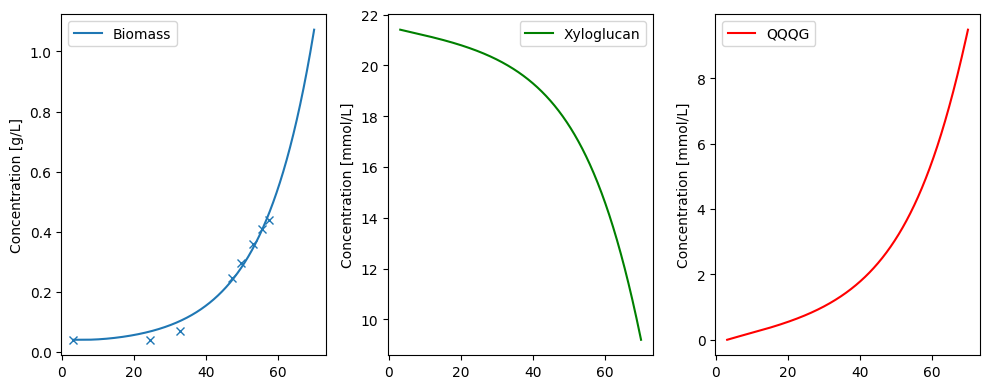

In [208]:
fig,ax = plt.subplots(1,3,figsize=(10,4))
ax[0].plot(sol.t, C_dict_results["Growth"],label = 'Biomass',color="tab:blue")
ax[0].legend()
ax[0].set_ylabel('Concentration [g/L]')
ax[0].plot(OD.x,OD[" y"],'x',color="tab:blue")


ax[1].plot(sol.t, C_dict_results["EX_xylogluc_e"], color='g',label='Xyloglucan')
#ax[1].set_ylim([0,3])
ax[1].legend()
ax[1].set_ylabel('Concentration [mmol/L]')

colors = ['r','g','y','b','pink']

ax[2].plot(sol.t, C_dict_results["EX_QQQG_e"], color='r',label="QQQG")
ax[2].legend()
ax[2].set_ylabel('Concentration [mmol/L]')
plt.tight_layout()

### Oligosaccharides

In [210]:
OD_oligo = pd.read_csv("../input/Ravachol2016_batch_data/OD_oligosaccharide.csv")

OD_oligo[" y"] = OD_oligo[" y"]*0.5
OD_oligo

,x,y
0,0.054563,0.010998
1,23.968407,0.012747
2,93.159978,0.150311
3,96.785936,0.172056
4,118.661109,0.297234
5,120.714660,0.312463
6,143.739090,0.437361


In [221]:
model = cobra.io.read_sbml_model('../models/RcH10_final.xml')
formula = model.metabolites.get_by_id("QQQG_e").notes["FORMULA"]
molarmass = molmass.Formula(formula).mass

xylog_glc_eq_dict =OrderedDict({
"EX_QQQG_e": 39/6})


C_dict =OrderedDict({
"Growth":OD_oligo.iloc[0,1],
"EX_QQQG_e": 3.5*1000/molarmass,
"EX_xylogluc_e":0})

rxns = list(C_dict.keys())
y0 = np.array(list(C_dict.values()))

objective_dir = ["max", "max"]
best_r2 = {}

media = pd.read_csv('../input/media_db.tsv',sep='\t')
media = media.groupby('medium').agg({'compound': set})['compound'].to_dict()

In [222]:

def optimize_parameters_inner_problem(combination,model,media,rxns,objective_dir,xylog_glc_eq_dict,alternative_solution=False):
    print(combination)
    ts = np.linspace(OD_oligo.iloc[0,0], 140, 1000)  
    #vmax_inner_option, km_inner_option, vmax_outer_option, km_outer_option,ki_option = combination

    sol = solve_ivp(
        fun=dynamic_system,
        t_span=(ts.min(), ts.max()),
        y0=y0,
        t_eval=ts,
        method='LSODA',
        args = (model,rxns,objective_dir,xylog_glc_eq_dict,combination)
    )

    interp_func = interp1d(sol.t, sol.y.T[:,0], kind='linear', fill_value="extrapolate")
    y_interp = interp_func(OD_oligo.x.values)

    r2_score_spec = r2_score(OD_oligo[" y"].values,y_interp)

    penalty =1000*(1 - r2_score_spec) + 10 * (np.std(y_interp)-np.std(OD[" y"]))**2
    print(f"1-r2: {penalty} and r2: {r2_score_spec}")
    
    if alternative_solution:
        return sol,penalty
    else:
        return penalty


In [214]:
model = read_model()

sol,penalty = optimize_parameters_inner_problem(combination=df_results.loc[5,('polished',  'parameters')],model=model,media=media,rxns=rxns,objective_dir=objective_dir,xylog_glc_eq_dict=xylog_glc_eq_dict,alternative_solution=True)

[0.18088801 0.26589735 5.65223336 1.62350264 9.45268298]
1-r2: 24511.32441736468 and r2: -23.510159044168255


In [215]:
C_dict_results = dict(zip(C_dict.keys(),sol.y))

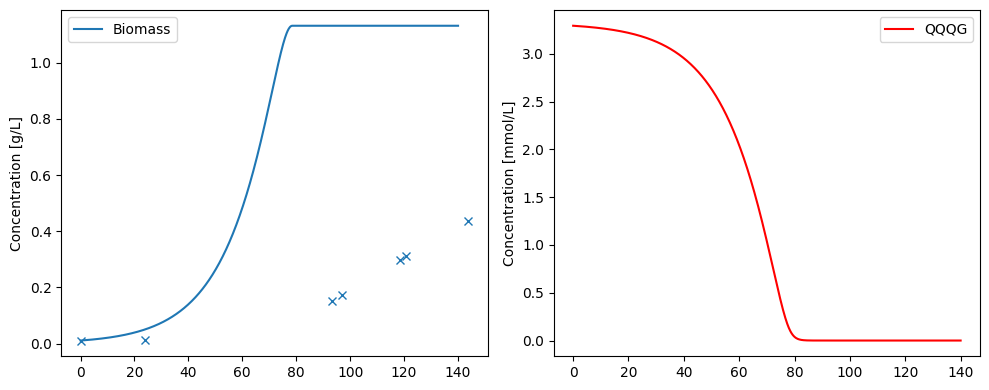

In [216]:
fig,ax = plt.subplots(1,2,figsize=(10,4))
ax[0].plot(sol.t, C_dict_results["Growth"],label = 'Biomass',color="tab:blue")
ax[0].legend()
ax[0].set_ylabel('Concentration [g/L]')
ax[0].plot(OD_oligo.x,OD_oligo[" y"],'x',color="tab:blue")


colors = ['r','g','y','b','pink']

ax[1].plot(sol.t, C_dict_results["EX_QQQG_e"], color='r',label="QQQG")
ax[1].legend()
ax[1].set_ylabel('Concentration [mmol/L]')
plt.tight_layout()

### Optimizing parameters for oligosaccharides

In [232]:
def dynamic_system(t, y,model,rxns,objective_dir,glc_eq_dict,combination):
    """Calculate the time derivative of external species."""    
    vmax_inner, Km_inner = combination
    vmax_outer, Km_outer,Ki = [0.1,0.1,0.1]
    rxns_map = copy.copy(rxns)
    rxns_map.remove("EX_xylogluc_e")
    conc_dict = dict(zip(rxns,y))
    
    # Calculate the specific exchanges fluxes at the given external concentrations.
    with model:
        cellulase = add_dynamic_bounds(model, conc_dict,glc_eq_dict,vmax_inner,Km_inner,vmax_outer,Km_outer,Ki)
        feasibility = cobra.util.fix_objective_as_constraint(model)
        lex_constraints = cobra.util.add_lexicographic_constraints(model, rxns_map, objective_dir)
        
    # Since the calculated fluxes are specific rates, we multiply them by the
    # biomass concentration to get the bulk exchange rates.
    fluxes =lex_constraints.values
    i = 1 
    for key, glc_eq in glc_eq_dict.items():
        uptake = fluxes[i]
        fluxes[i] = uptake - cellulase/glc_eq # 1 mol of cellulase produces one mol of glucose equivalents
        i +=1
        
    fluxes =np.append(fluxes, cellulase/glc_eq)

    fluxes *= conc_dict["Growth"]

    if dynamic_system.pbar is not None:
        dynamic_system.pbar.update(1)
        dynamic_system.pbar.set_description('t = {:.3f}'.format(t))
    
    
    return fluxes

dynamic_system.pbar = None

#### Differential evolution

In [233]:
model = read_model()

pop_min = []
energies_min = []
res_min = differential_evolution(optimize_parameters_inner_problem,
                  bounds=[(0.1,1),(0.1,10)],
                  args=(model,media,rxns,objective_dir,xylog_glc_eq_dict),
                  strategy = "rand2bin",
                  workers=maplike_fun,
                  mutation = (0.1,0.5),
                  recombination=0.1,
                  popsize=3,
                  maxiter=50,
                  polish=False,
                  seed=1,
                  updating='deferred')

[[0.91287918 1.28853541]
 [0.25001716 9.48061218]
 [0.1625533  2.24884874]
 [0.42201338 5.6201752 ]
 [0.75951512 7.58904761]
 [0.57793903 3.55235868]]
[0.91287918 1.28853541]
1-r2: 65051.95198303856 and r2: -64.05059795545066
[0.25001716 9.48061218]
1-r2: 2313.5456140740007 and r2: -1.3133256886798184
[0.1625533  2.24884874]
1-r2: 274.47675237963864 and r2: 0.7255561562513797
[0.42201338 5.6201752 ]
1-r2: 6410.224265042745 and r2: -5.409999863242611
[0.75951512 7.58904761]
1-r2: 14349.80486389556 and r2: -13.349247810015285
[0.57793903 3.55235868]
1-r2: 23033.925381829577 and r2: -22.033040927551628
[[0.34685829 2.24884874]
 [0.25001716 7.76198952]
 [0.10734129 1.28853541]
 [0.42201338 8.70030641]
 [0.48797379 7.58904761]
 [0.57793903 9.39472824]]
[0.34685829 2.24884874]
1-r2: 17319.809959107075 and r2: -16.319072233239183
[0.25001716 7.76198952]
1-r2: 1914.3958025241432 and r2: -0.9142092706213749
[0.10734129 1.28853541]
1-r2: 1701.0964345738137 and r2: -0.7009293230361207
[0.42201338

In [238]:
energies_min = np.array(energies_min)

pop_up_min = [pop_min[0]]
energies_up_min = [energies_min[0]]
for i in range(1, len(pop_min)):
    new_energies_min = np.copy(energies_up_min[-1])
    new_pop_min = np.copy(pop_up_min[-1])
    pos_min = energies_min[i] < new_energies_min
    new_energies_min[pos_min] = energies_min[i][pos_min]
    new_pop_min[pos_min] = pop_min[i][pos_min]
    pop_up_min.append(new_pop_min)
    energies_up_min.append(new_energies_min)

    
    

In [242]:
best_evo_min = pd.DataFrame(pop_up_min[-1])

In [257]:
    
best_evo_min["penalty"]=energies_up_min[-1]

best_evo_min["r2 approx"] = (1000-energies_up_min[-1])/1000

best_evo_min_sorted = best_evo_min.sort_values("penalty")

#best_evo_min_sorted.to_csv("../output/differential_evolution_results_xyloglucan_oligosaccharides.csv")

best_evo_min_sorted

,0,1,penalty,r2 approx
1,0.366923,7.841865,15.751405,0.984249
3,0.379054,8.247662,17.055254,0.982945
5,0.399776,8.770347,18.451265,0.981549
0,0.422013,9.398685,20.417316,0.979583
4,0.429471,9.758326,20.918714,0.979081
2,0.421852,9.727694,37.383072,0.962617


#### Polishing solutions

In [252]:
df = pd.DataFrame.from_dict({(i,j): polished_solutions[i][j] 
                           for i in polished_solutions.keys() 
                           for j in polished_solutions[i].keys()},
                       orient='index').unstack()


df.T.index.names = ["data","origin"]

df_results = df.T.reorder_levels(["origin","data"]).sort_index().T

In [253]:
df_results.sort_values(('polished',  'r2 approx'),ascending=False)

origin diff_ev                                                      \
data   message                                parameters r2 approx   
2          NaN    [0.399775993166241, 8.770347375193515]  0.981549   
5          NaN  [0.42185166298537347, 9.727694347444976]  0.962617   
0          NaN    [0.36692348507451844, 7.8418648272248]  0.984249   
1          NaN   [0.3790536956657697, 8.247662384487551]  0.982945   
3          NaN  [0.42201338362256696, 9.398685145033115]  0.979583   
4          NaN  [0.42947062601977803, 9.758326274673294]  0.979081   

origin                                         polished  \
data                                            message   
2       CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   
5       CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   
0       CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   
1       CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   
3       CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   
4       CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

origin                                                       
data                                   parameters r2 approx  
2        [0.18298430931653828, 2.471020081833092]  0.997881  
5         [0.1829813903895169, 2.470938547608054]  0.997881  
0       [0.18297544263926824, 2.4707652837331397]  0.997881  
1        [0.18305341985632542, 2.473045810818364]  0.997881  
3        [0.41973201417364675, 9.402928046105638]  0.980992  
4          [0.4309847405649875, 9.73190038523065]  0.980326

In [254]:
model = read_model()

sol,penalty = optimize_parameters_inner_problem(combination=df_results.loc[2,("polished","parameters")],model=model,media=media,rxns=rxns,objective_dir=objective_dir,xylog_glc_eq_dict=xylog_glc_eq_dict,alternative_solution=True)

[0.18298431 2.47102008]
1-r2: 2.118740921739183 and r2: 0.9978825392146194


In [255]:
C_dict_results = dict(zip(C_dict.keys(),sol.y))

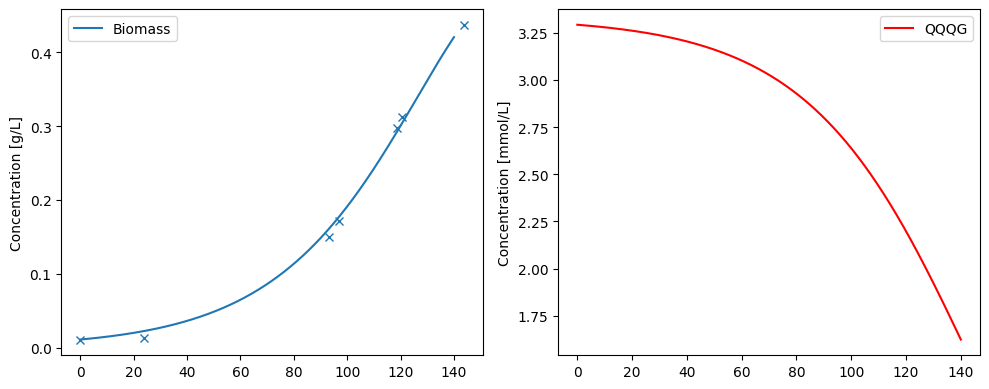

In [256]:
fig,ax = plt.subplots(1,2,figsize=(10,4))
ax[0].plot(sol.t, C_dict_results["Growth"],label = 'Biomass',color="tab:blue")
ax[0].legend()
ax[0].set_ylabel('Concentration [g/L]')
ax[0].plot(OD_oligo.x,OD_oligo[" y"],'x',color="tab:blue")


colors = ['r','g','y','b','pink']

ax[1].plot(sol.t, C_dict_results["EX_QQQG_e"], color='r',label="QQQG")
ax[1].legend()
ax[1].set_ylabel('Concentration [mmol/L]')
plt.tight_layout()

## Mapping of carbon flow distribution in central metabolic pathway ... ([Desvaux 2004](https://koreascience.kr/article/JAKO200430710404636.pdf)) 

In [127]:
ammonia_limited = pd.read_csv("../input/Desvaux2004_chemostat_data/ammonia_limited.csv",)

ammonia_limited = ammonia_limited.loc[1:,~ammonia_limited.columns.str.contains("%")]
ammonia_limited.set_index("Carbon flow",inplace=True)

In [128]:
import reframed

In [129]:
model = reframed.load_cbmodel("../models/RcH10_final2.xml")
#model.reactions.R_EX_gal_e.ub=0
#model.reactions.R_EX_rib__D_e.ub=0
#model.reactions.R_EX_succ_e.=0
#model.reactions.R_LDH_D.ub=0
#model.reactions.R_LDH_D.lb=0
#model.add_ratio_constraint("R_EX_h2_e","R_EX_cellb_e",-4)

In [130]:
nh4_limiting = {}

for growth_rate_str in ammonia_limited.columns:
    growth_rate = float(growth_rate_str)
    
    model.reactions.Growth.lb = growth_rate
    model.reactions.Growth.ub = growth_rate
    
    sol = reframed.FBA(model,objective={"Growth":0,"R_EX_nh4_e":1})
    nh4_limiting[growth_rate] = sol.fobj
    

In [131]:
nh4_limiting

{0.023: -0.22752253200000538,
 0.036: -0.35612222399999993,
 0.052: -0.5143987680000031,
 0.082: -0.8111672880000036}

In [132]:
model.reactions.Growth.lb = 0
model.reactions.Growth.ub = 1000

production = {}

for growth_rate, ammonia_uptake in nh4_limiting.items():

    sol = reframed.pFBA(model,constraints={"R_EX_nh4_e":(ammonia_uptake,0)})
    
    production[growth_rate] = {"q_acetate":sol.values["R_EX_ac_e"],
                              "q_ethanol":sol.values["R_EX_etoh_e"],
                              "q_lactate":sol.values["R_EX_lac__L_e"],
                              "q_pyr_ex":sol.values["R_EX_pyr_e"],
                              "q_co2":sol.values["R_EX_co2_e"]} 
    

In [133]:
pd.DataFrame(production)

,0.023,0.036,0.052,0.082
q_acetate,1.951142,2.157344,2.411130,2.886979
q_ethanol,0.000000,0.000000,0.000000,0.000000
q_lactate,0.000000,0.000000,0.000000,0.000000
q_pyr_ex,0.000000,0.000000,0.000000,0.000000
q_co2,1.983304,2.207684,2.483844,3.001643


In [134]:
ammonia_limited.iloc[13:,:]

,0.023,0.036,0.052,0.082
Carbon flow,,,,
q_lactate,0.69,0.79,2.94,87.20
q_extracellular pyruvate,NaN,NaN,0.42,0.44
q_carbon dioxide,1.88,2.35,2.78,2.89
q_ethanol,1.79,2.22,2.00,2.00
q_acetate,1.97,2.49,3.56,3.78


In [101]:
sol.show_values(pattern="R_EX_",sort=True)

R_EX_h2o_e   -3.14635
R_EX_cellb_e -1.0386
R_EX_nh4_e   -0.811167
R_EX_so4_e   -0.52036
R_EX_pi_e    -0.0717715
R_EX_k_e     -0.0160058
R_EX_mg2_e   -0.00071135
R_EX_fe3_e   -0.000640256
R_EX_fe2_e   -0.00055063
R_EX_ca2_e   -0.00042681
R_EX_cl_e    -0.00042681
R_EX_cu2_e   -5.8138e-05
R_EX_mn2_e   -5.6662e-05
R_EX_ribflv_e -3.6572e-05
R_EX_zn2_e   -2.7962e-05
R_EX_cobalt2_e -8.2e-06
R_EX_4hba_e   1.8286e-05
R_EX_succ_e   0.0271718
R_EX_d23hb_e  0.0308609
R_EX_h2s_e    0.499809
R_EX_h_e      2.72493
R_EX_ac_e     2.99455
R_EX_co2_e    3.10921
R_EX_h2_e     4.15442


## Whole Proteome Analyses on Ruminiclostridium cellulolyticum Show a Modulation of the Cellulolysis Machinery in Response to Cellulosic Materials with Subtle Differences in Chemical and Structural Properties ([Badalato et al. 2017](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5256962/))


NB: Need to make sure that the media is good.

In [4]:
model = reframed.load_cbmodel("../models/RcH10_final2.xml")

In [5]:
DNA = ['M_datp_c',
'M_dctp_c',
'M_dgtp_c',
'M_dttp_c']


DNA_mass_list = []
for nucleo in DNA:
    
    molarmass_nuc = molmass.Formula(model.metabolites[nucleo].metadata["FORMULA"]).mass
    molarmass_h2o = molmass.Formula("H2O").mass
    stoichiometry = -model.reactions.Growth.stoichiometry[nucleo]
    total_g = (molarmass_nuc+molarmass_h2o)*stoichiometry/1000
    DNA_mass_list.append(total_g)
    
DNA_mass = sum(DNA_mass_list) # g DNA/1 g bio
print(f"g_DNA/g_bio: {DNA_mass}")
dna_genome_copies = (1e-9)/227703 # g DNA/genome copies - from article

g_DNA/g_bio: 0.0532797844354618


In [6]:
cotton_genome_count = pd.read_csv("../input/Badalato2017_batch_data/cotton_genome_count_ml.csv")
cotton_genome_count["Biomass [g/L]"] = cotton_genome_count[" y"].map(lambda x:(x*dna_genome_copies/DNA_mass)*1e8 *1e4) # x [(genome copy nr) * (1e-8)/mL] * dna_genome_copies [g_DNA/(genome copy nr)] / DNA_mass [g_DNA/g_bio] = concentration [(1e-8)*g_bio/(mL)] -> concentration 1e3*1e8 [g_bio/L]
cotton_biomass = cotton_genome_count.drop(" y",axis=1).set_index("x")
cotton_biomass.index.name="time [h]"
cotton_biomass.reset_index(inplace=True)

cotton_biomass

,time [h],Biomass [g/L]
0,7.055952,0.002010
1,25.879545,0.015077
2,49.044302,0.021893
3,73.160304,0.059316
4,96.768620,0.083310
5,144.184762,0.111193
6,190.614034,0.136799


In [7]:
tissue_genome_count = pd.read_csv("../input/Badalato2017_batch_data/tissue_genome_count_ml.csv")
tissue_genome_count["Biomass [g/L]"] = tissue_genome_count[" y"].map(lambda x:(x*dna_genome_copies/DNA_mass)*1e8 *1e3) # x [(genome copy nr) * (1e-8)/mL] * dna_genome_copies [g_DNA/(genome copy nr)] / DNA_mass [g_DNA/g_bio] = concentration [(1e-8)*g_bio/(mL)] -> concentration 1e3*1e8 [g_bio/L]
tissue_biomass = tissue_genome_count.drop(" y",axis=1).set_index("x")
tissue_biomass.index.name="time [h]"
tissue_biomass.reset_index(inplace=True)
tissue_biomass

,time [h],Biomass [g/L]
0,4.643996,0.001601
1,26.066587,0.003424
2,49.165435,0.002734
3,73.096175,0.003489
4,10.992750,0.000243
5,96.471133,0.006457
6,143.771488,0.008937
7,190.405615,0.010178


In [8]:
whatman_paper_genome_count = pd.read_csv("../input/Badalato2017_batch_data/whatman_paper_genome_count_ml.csv")
whatman_paper_genome_count["Biomass [g/L]"] = whatman_paper_genome_count[" y"].map(lambda x:(x*dna_genome_copies/DNA_mass)*1e8 *1e3) # x [(genome copy nr) * (1e-8)/mL] * dna_genome_copies [g_DNA/(genome copy nr)] / DNA_mass [g_DNA/g_bio] = concentration [(1e-8)*g_bio/(mL)] -> concentration 1e3*1e8 [g_bio/L]
whatman_paper_biomass = whatman_paper_genome_count.drop(" y",axis=1).set_index("x")
whatman_paper_biomass.index.name="time [h]"
whatman_paper_biomass.reset_index(inplace=True)
whatman_paper_biomass

,time [h],Biomass [g/L]
0,5.486577,0.000297
1,26.764879,0.000137
2,49.644619,0.001417
3,73.268967,0.004940
4,96.252026,0.004655
5,143.771488,0.006863
6,190.872330,0.006490


In [126]:

def add_dynamic_bounds(model, conc_dict,glc_eq_dict):
    """Use external concentrations to bound the uptake flux of glucose."""
    #biomass, glucose, cellobiose,cellulose = y  # expand the boundary species
    
    for key,glc_eq in glc_eq_dict.items():
        #max_import = -(2.9/(glc_eq*len(glc_eq_dict)))* conc_dict[key] / (4.4/glc_eq + conc_dict[key])
        max_import = -(5/(glc_eq*len(glc_eq_dict)))* conc_dict[key] / (0.1 + conc_dict[key])
        print(f"{key}: {max_import}")
        model.reactions.get_by_id(key).lower_bound = max_import
        
    #cellulase =  -2.9*(conc_dict["EX_cellulose_e"]/((1 + (conc_dict["EX_cellb_e"]/11))*4.4  + conc_dict["EX_cellulose_e"]))
    cellulase =  -2.9*(conc_dict["EX_cellulose_e"]/((1 + (conc_dict["EX_cellb_e"]/11))*4.4  + conc_dict["EX_cellulose_e"]))
    
    return cellulase
    
    
    
def dynamic_system(t, y,rxns,objective_dir,glc_eq_dict):
    """Calculate the time derivative of external species."""

    #biomass, glucose, cellobiose,cellulose = y  # expand the boundary species
    
    rxns_map = copy.copy(rxns)
    rxns_map.append("EX_cellulose_e")
    
    conc_dict = dict(zip(rxns_map,y))
    
    # Calculate the specific exchanges fluxes at the given external concentrations.
    with model:
        cellulase = add_dynamic_bounds(model, conc_dict,glc_eq_dict)
        feasibility = cobra.util.fix_objective_as_constraint(model)
        lex_constraints = cobra.util.add_lexicographic_constraints(model, rxns, objective_dir)
        
    # Since the calculated fluxes are specific rates, we multiply them by the
    # biomass concentration to get the bulk exchange rates.
    fluxes =lex_constraints.values
    
    i = 1 
    for key, glc_eq in glc_eq_dict.items():
        uptake = fluxes[i]
        fluxes[i] = uptake - cellulase*1/(len(glc_eq_dict)*glc_eq)
        i +=1
        
    fluxes =np.append(fluxes, cellulase)
    fluxes *= conc_dict["Growth"]

    # This implementation is **not** efficient, so I display the current
    # simulation time using a progress bar.
    if dynamic_system.pbar is not None:
        dynamic_system.pbar.update(1)
        dynamic_system.pbar.set_description('t = {:.3f}'.format(t))
    
    return fluxes

dynamic_system.pbar = None


### Whatman Paper/Cotton (Cellulose)

In [120]:
model = cobra.io.read_sbml_model('../models/RcH10_final2.xml')
 
medium = model.medium

medium["EX_glc__D_e"]=10
model.medium = medium
#cobra.flux_analysis.parsimonious.add_pfba(model)
cobra.util.add_lp_feasibility(model)

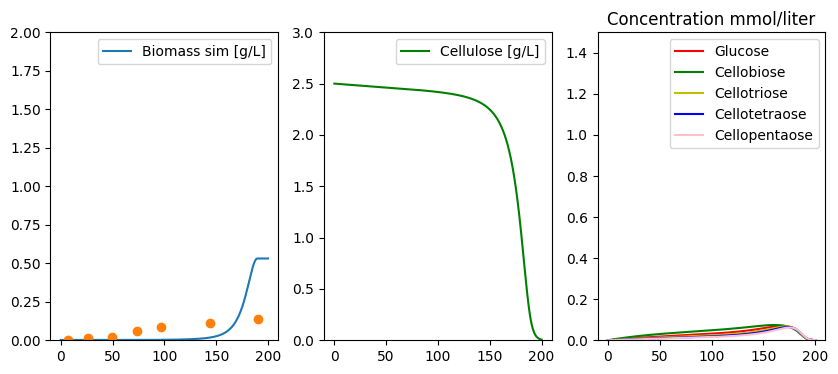

In [128]:
fig,ax = plt.subplots(1,3,figsize=(10,4))
#ax[0].plot(sol.t, sol.y.T[:, 0]*1000,label = 'Biomass [mg/L]')
ax[0].plot(sol.t, sol.y.T[:, 0],label = 'Biomass sim [g/L]')

#ax[0].set_ylim([0,600])
ax[0].set_ylim([0,2])
ax[0].legend()

ax[0].plot(cotton_biomass["time [h]"].values, cotton_biomass["Biomass [g/L]"].values,'o',label = 'Biomass exp[g/L]')

cotton_biomass

ax[1].plot(sol.t, sol.y.T[:, -1]*tot_molarmass/1000, color='g',label='Cellulose [g/L]')
#ax[1].set_title('Cellulose [g/L]',color='g')
ax[1].set_ylim([0,3])
ax[1].legend()

ax[2].plot(sol.t, sol.y.T[:, 1], color='r',label="Glucose")
ax[2].plot(sol.t, sol.y.T[:, 2], color='g',label="Cellobiose")
ax[2].plot(sol.t, sol.y.T[:, 3], color='y',label="Cellotriose")
ax[2].plot(sol.t, sol.y.T[:, 4], color='b',label="Cellotetraose")
ax[2].plot(sol.t, sol.y.T[:, 5], color='pink',label="Cellopentaose")

ax[2].set_ylim([0,1.5])

ax[2].set_title('Concentration mmol/liter')
ax[2].legend()